Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**deklaracja hiperparametrów:**

In [ ]:
_learningRate = 0.001
_epochs = 50
_batchSize = 621

##Rozpoznawanie cyfr - zbiór **MNIST**

Pobranie danych

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

Wybrane informacje o zbiorze

In [ ]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

**Wielkości zbiorów treningowych i testowych ustalamy na 10000:**

In [ ]:
train_data = train_data[:1000]
train_labels = train_labels[:1000]
test_data = test_data[:1000]
test_labels = test_labels[:1000]

In [ ]:
train_data.shape,train_labels.shape

((1000, 28, 28), (1000,))

In [ ]:
test_data.shape,test_labels.shape

((1000, 28, 28), (1000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[0]

5

Kodowanie one-hot

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_data.shape,train_labels.shape

((1000, 28, 28), (1000, 10))

In [ ]:
test_data.shape,test_labels.shape

((1000, 28, 28), (1000, 10))

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Wizualizacja

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


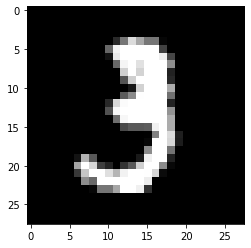

In [ ]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)
    
img_index = 10
plot_image(img_index)

In [ ]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [ ]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate = _learningRate)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(train_images, train_labels, batch_size = _batchSize, epochs = _epochs, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 1s 363ms/step - loss: 139.8122 - accuracy: 0.1085 - val_loss: 79.0659 - val_accuracy: 0.1600
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: 70.8421 - accuracy: 0.2147 - val_loss: 59.3486 - val_accuracy: 0.3000
Epoch 3/50
2/2 [==============================] - 0s 27ms/step - loss: 43.2534 - accuracy: 0.3863 - val_loss: 45.4788 - val_accuracy: 0.4300
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 29.6590 - accuracy: 0.5517 - val_loss: 28.4031 - val_accuracy: 0.5950
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 17.4718 - accuracy: 0.6961 - val_loss: 19.1871 - val_accuracy: 0.6950
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 11.2746 - accuracy: 0.7639 - val_loss: 16.3155 - val_accuracy: 0.7050
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 10.0121 - accuracy: 0.7947 - val_loss: 16.4830 - val_accuracy: 0.7250
Epoch 8/50


In [ ]:
history_dict = h.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

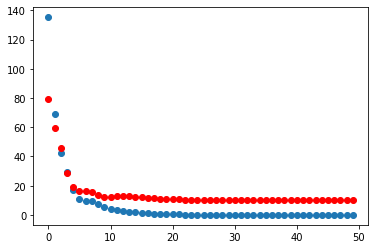

In [ ]:
plt.scatter(np.arange(_epochs),h.history['loss'])
plt.scatter(np.arange(_epochs),h.history['val_loss'],c='r')
plt.show()

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 9.783103942871094
Test accuracy: 0.7929999828338623


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 2.1775042e-22, 0.0000000e+00, 0.0000000e+00,
        1.1930238e-22, 0.0000000e+00]], dtype=float32)

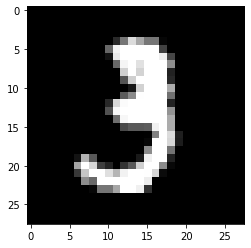

In [ ]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)
    
img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

# **Regularyzacja** - metoda 1

Zwiększamy zbiór treningowy z **1000** do **2500** :

In [ ]:
train_data = train_data[:2500]
train_labels = train_labels[:2500]
test_data = test_data[:2500]
test_labels = test_labels[:2500]

Model taki sam:

In [ ]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [ ]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate = _learningRate)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
h = model.fit(train_images, train_labels, batch_size = _batchSize, epochs = _epochs, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 142ms/step - loss: 127.3870 - accuracy: 0.0998 - val_loss: 60.1832 - val_accuracy: 0.2450
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 55.2683 - accuracy: 0.2397 - val_loss: 37.2202 - val_accuracy: 0.4750
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 27.0071 - accuracy: 0.5151 - val_loss: 25.2673 - val_accuracy: 0.6250
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 13.9416 - accuracy: 0.7107 - val_loss: 20.5515 - val_accuracy: 0.6850
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 10.5401 - accuracy: 0.7906 - val_loss: 18.3184 - val_accuracy: 0.7350
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 8.5984 - accuracy: 0.8124 - val_loss: 17.1732 - val_accuracy: 0.7600
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 6.7408 - accuracy: 0.8553 - val_loss: 16.4000 - val_accuracy: 0.7550
Epoch 8/50
2/

Błąd treningowy i walidacyjny:

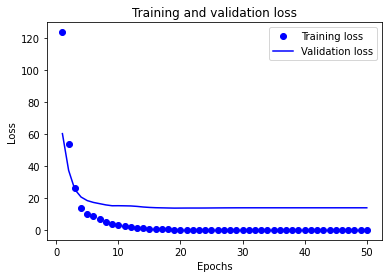

In [ ]:
import matplotlib.pyplot as plt
history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_values[:10]

[123.55396270751953,
 53.7903938293457,
 26.37090301513672,
 13.8853120803833,
 10.222886085510254,
 8.527729988098145,
 6.709895133972168,
 4.962587356567383,
 3.765964984893799,
 2.8911354541778564]

# **Regularyzacja** - metoda 2

Zmniejszamy **wielkość modelu**:

In [ ]:
model = Sequential()
model.add(Dense(units = 10, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))


opt = keras.optimizers.Adam(learning_rate = _learningRate)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
h = model.fit(train_images, train_labels, batch_size = _batchSize, epochs = _epochs, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 1s 242ms/step - loss: 86.3090 - accuracy: 0.1202 - val_loss: 55.1939 - val_accuracy: 0.0800
Epoch 2/50
2/2 [==============================] - 0s 31ms/step - loss: 51.1071 - accuracy: 0.1271 - val_loss: 27.3126 - val_accuracy: 0.0850
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 26.5869 - accuracy: 0.1065 - val_loss: 11.5993 - val_accuracy: 0.1200
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 12.8838 - accuracy: 0.0994 - val_loss: 5.4959 - val_accuracy: 0.1100
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 6.6649 - accuracy: 0.0958 - val_loss: 3.5188 - val_accuracy: 0.1100
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 4.2565 - accuracy: 0.0890 - val_loss: 2.9815 - val_accuracy: 0.1000
Epoch 7/50
2/2 [==============================] - 0s 44ms/step - loss: 3.2842 - accuracy: 0.0969 - val_loss: 2.8210 - val_accuracy: 0.0900
Epoch 8/50
2/2 [===

Błąd treningowy i walidacyjny:

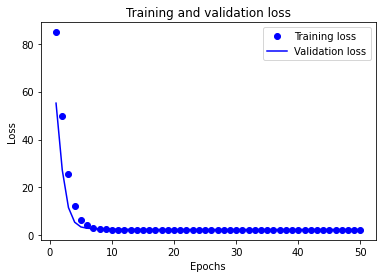

In [ ]:
import matplotlib.pyplot as plt
history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Spróbujmy teraz znacznie zwiększyć **wielkość modelu**:

In [ ]:
model = Sequential()
model.add(Dense(units = 700, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))


opt = keras.optimizers.Adam(learning_rate = _learningRate)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 700)               549500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7010      
Total params: 556,510
Trainable params: 556,510
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
h = model.fit(train_images, train_labels, batch_size = _batchSize, epochs = _epochs, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 143ms/step - loss: 106.0985 - accuracy: 0.1240 - val_loss: 64.5352 - val_accuracy: 0.4650
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 47.8747 - accuracy: 0.5335 - val_loss: 38.8835 - val_accuracy: 0.5450
Epoch 3/50
2/2 [==============================] - 0s 28ms/step - loss: 24.4333 - accuracy: 0.6613 - val_loss: 16.1237 - val_accuracy: 0.8050
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 8.1368 - accuracy: 0.8600 - val_loss: 21.5862 - val_accuracy: 0.7650
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 12.9560 - accuracy: 0.8314 - val_loss: 18.0426 - val_accuracy: 0.7900
Epoch 6/50
2/2 [==============================] - 0s 28ms/step - loss: 7.9648 - accuracy: 0.8831 - val_loss: 16.4184 - val_accuracy: 0.8500
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 4.8045 - accuracy: 0.9292 - val_loss: 17.1736 - val_accuracy: 0.8600
Epoch 8/50
2/2

Błąd treningowy i walidacyjny:

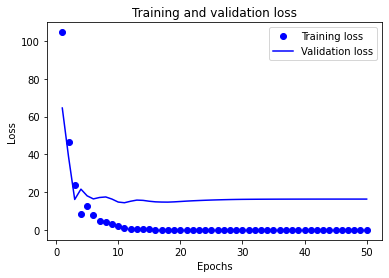

In [ ]:
import matplotlib.pyplot as plt
history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Regularyzacja** - metoda 3

Import **normy L2**:

In [ ]:
from keras.regularizers import l2

Danie **regularyzacji L2** do warstw:

In [ ]:
model = Sequential()
model.add(Dense(units = 128, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate = _learningRate)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
h = model.fit(train_images, train_labels, batch_size = _batchSize, epochs = _epochs, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 152ms/step - loss: 182.5745 - accuracy: 0.0720 - val_loss: 103.4728 - val_accuracy: 0.1500
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 92.1563 - accuracy: 0.1899 - val_loss: 63.9748 - val_accuracy: 0.3850
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 56.8560 - accuracy: 0.4067 - val_loss: 49.6479 - val_accuracy: 0.4900
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 39.3520 - accuracy: 0.4938 - val_loss: 44.0513 - val_accuracy: 0.5150
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 28.4170 - accuracy: 0.5940 - val_loss: 32.3342 - val_accuracy: 0.5650
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 17.8855 - accuracy: 0.7055 - val_loss: 22.3226 - val_accuracy: 0.6450
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 11.6093 - accuracy: 0.7781 - val_loss: 20.3663 - val_accuracy: 0.6250
Epoch 8/50

Błąd treningowy i walidacyjny:

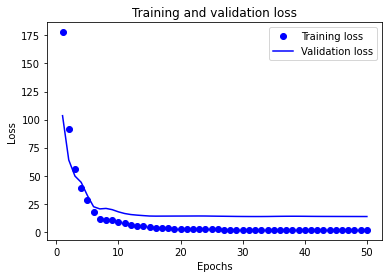

In [ ]:
import matplotlib.pyplot as plt
history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Regularyzacja** - metoda 4

Import **warstwy Dropout**:

In [ ]:
from keras.layers import Dropout

Danie warstw **Dropout**:

In [ ]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate = _learningRate)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
h = model.fit(train_images, train_labels, batch_size = _batchSize, epochs = _epochs, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 151ms/step - loss: 212.6788 - accuracy: 0.1134 - val_loss: 76.0407 - val_accuracy: 0.1750
Epoch 2/50
2/2 [==============================] - 0s 31ms/step - loss: 121.0504 - accuracy: 0.1557 - val_loss: 56.1110 - val_accuracy: 0.3250
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 86.0381 - accuracy: 0.2431 - val_loss: 39.9557 - val_accuracy: 0.4500
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 62.1256 - accuracy: 0.3562 - val_loss: 27.0061 - val_accuracy: 0.5700
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 44.5629 - accuracy: 0.4683 - val_loss: 18.4376 - val_accuracy: 0.6650
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 30.2771 - accuracy: 0.5765 - val_loss: 14.2265 - val_accuracy: 0.7150
Epoch 7/50
2/2 [==============================] - 0s 144ms/step - loss: 22.2822 - accuracy: 0.6258 - val_loss: 12.4569 - val_accuracy: 0.7200
Epoch 8/5

Błąd treningowy i walidacyjny:

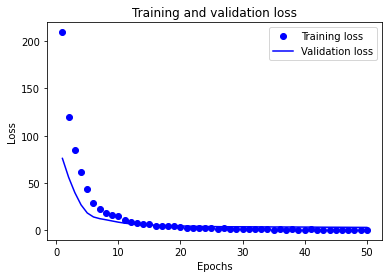

In [ ]:
import matplotlib.pyplot as plt
history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()